### 가축사육현황 EDA
---


데이터분석 목적

- “분기별 가축사육현황”
- ‘마리수-번식우’, ‘번식우’,‘마리수’,’번식우가 아닌 소 중 1세 미만(암,수) 제외’에 해당하는 값을 사용할 예정.
- 번식우: 기르기 위한 소이기 때문에 제외한 값도 확인해보고자함
- 1세 미만(암,수)는 출하 월령에 미치지 못하기 때문.
- ‘마리수-번식우’,’마리수’ 각각 y값과 EDA


데이터 셋 분석 기간
- 2013.01.01 ~ 2018.12.31

In [1]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
breeding_status_data = pd.read_csv("./data/02. 가축사육현황.csv", encoding="cp949")


In [3]:
import os

os.chdir(r"C:\Users\a0105\Desktop\DSC\ddd\preprocessing")
target_data =price_processing = pd.read_pickle('축산물_시계열 데이터로 변환(전국).pkl')

print(f"Breeding status Columns \n  {breeding_status_data.columns}")
print()
print(f"Target data columns \n {target_data.columns}")

Breeding status Columns 
  Index(['Unnamed: 0', '연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)',
       '1~2세(수)', '2세이상(암)', '2세이상(수)'],
      dtype='object')

Target data columns 
 Index(['주간날짜', '한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균', 'year', 'month'], dtype='object')


In [4]:
# Create Data Profile Report
"""
breeding_data_profile = status_df.profile_report()
breeding_data_profile.to_file("./data/breeding_status_report.html")

target_data_profile = target_data.profile_report()
target_data_profile.to_file("./data/축산물_실시간_경매시황중계정보.html")
"""

'\nbreeding_data_profile = status_df.profile_report()\nbreeding_data_profile.to_file("./data/breeding_status_report.html")\n\ntarget_data_profile = target_data.profile_report()\ntarget_data_profile.to_file("./data/축산물_실시간_경매시황중계정보.html")\n'

In [5]:
print("Target Data Statistics Summary")
target_data.describe()

Target Data Statistics Summary


,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
count,298.000000,298.000000,298.000000,298.000000
mean,15856.768752,4570.441539,2015.379195,6.322148
std,2277.214985,801.331624,1.655672,3.391946
min,10911.200000,2030.500000,2013.000000,1.000000
25%,13994.850000,4121.300000,2014.000000,3.000000
50%,16763.000000,4530.000000,2015.000000,6.000000
75%,17608.750000,5075.000000,2017.000000,9.000000
max,19729.000000,6256.000000,2018.000000,12.000000


#### EDA을 위한 데이터 전처리

In [6]:
def remove_semi(df):
    columns = list(df.columns)
    for c in columns:
        if df[c].dtype != int:
            df[c] = df[c].apply(lambda x : str(x).replace(",",""))
    return df

In [7]:
# Drop Unnamed field
status_df = breeding_status_data[['연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)',
       '1~2세(수)', '2세이상(암)', '2세이상(수)']]
# convert string value to interger
status_df = remove_semi(status_df)


C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
status_df = status_df.astype('int64')

In [9]:
# fit date range
status_df = status_df[status_df["연도"] >= 2013]

In [10]:
status_df["날짜"] = status_df["연도"].astype("str") + "-" + status_df["월"].astype("str")
status_df[["연도", "월"]] = status_df[["연도", "월"]].astype("str")

status_df.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3


### 추가 Columns 생성
---

1. 번식우 아닌 소
2. 번식우 아닌 소 중 세 미만(암,수) 제외

In [11]:
status_df.columns

Index(['연도', '월', '마리수', '번식우', '1세미만(암)', '1세미만(수)', '1~2세(암)', '1~2세(수)',
       '2세이상(암)', '2세이상(수)', '날짜'],
      dtype='object')

In [12]:
status_df["번식우 아닌 소"] = status_df["마리수"] - status_df["번식우"]
status_df["마리 수 중 1세 미만(암,수) 제외"] = status_df["1~2세(암)"] + status_df["1~2세(수)"] + status_df["2세이상(암)"]  + status_df["2세이상(수)"]

status_df["번식우 아닌 소 중 1세 미만(암,수) 제외"] = status_df['번식우 아닌 소']-(status_df['1세미만(암)']+status_df['1세미만(수)'])
status_df["1~2세(모든 소)"] = status_df["1~2세(암)"] + status_df["1~2세(수)"]

status_df.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소)
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6,1474,2221,632,903
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9,1480,2235,673,915
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12,1418,2118,617,911
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3,1616,2249,781,956


### LiveStock Data EDA
---

In [13]:
print(f"LiveStock Status Data Shape : {status_df.shape}")
status_df.head()

LiveStock Status Data Shape : (28, 15)


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소)
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6,1474,2221,632,903
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9,1480,2235,673,915
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12,1418,2118,617,911
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3,1616,2249,781,956


In [14]:
print("LiveStock Data Statistics Summary")
status_df.describe()

LiveStock Data Statistics Summary


,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3038.928571,1608.857143,394.500000,477.857143,402.714286,471.178571,1043.107143,249.678571,1430.071429,2166.678571,557.714286,873.892857
std,110.832850,135.560760,23.359509,30.358005,14.777002,18.320306,46.945468,42.816623,101.993801,89.556956,137.964262,32.920037
min,2821.000000,1415.000000,362.000000,434.000000,376.000000,435.000000,956.000000,172.000000,1279.000000,1981.000000,370.000000,811.000000
25%,2965.250000,1473.500000,376.750000,456.500000,392.500000,462.000000,1006.500000,220.250000,1363.750000,2109.000000,445.000000,853.250000
50%,3031.000000,1612.000000,385.500000,471.000000,401.500000,470.500000,1037.000000,253.500000,1406.000000,2168.000000,506.000000,870.500000
75%,3114.000000,1720.500000,411.500000,499.250000,409.750000,480.000000,1072.000000,274.250000,1480.500000,2237.250000,659.500000,890.500000
max,3269.000000,1843.000000,441.000000,537.000000,442.000000,514.000000,1137.000000,344.000000,1668.000000,2351.000000,869.000000,956.000000


In [15]:
print("===LiveStock Check Data Missing Values=====")
status_df.isna().any()

===LiveStock Check Data Missing Values=====


연도                          False
월                           False
마리수                         False
번식우                         False
1세미만(암)                     False
1세미만(수)                     False
1~2세(암)                     False
1~2세(수)                     False
2세이상(암)                     False
2세이상(수)                     False
날짜                          False
번식우 아닌 소                    False
마리 수 중 1세 미만(암,수) 제외        False
번식우 아닌 소 중 1세 미만(암,수) 제외    False
1~2세(모든 소)                  False
dtype: bool

결측치 존재 x

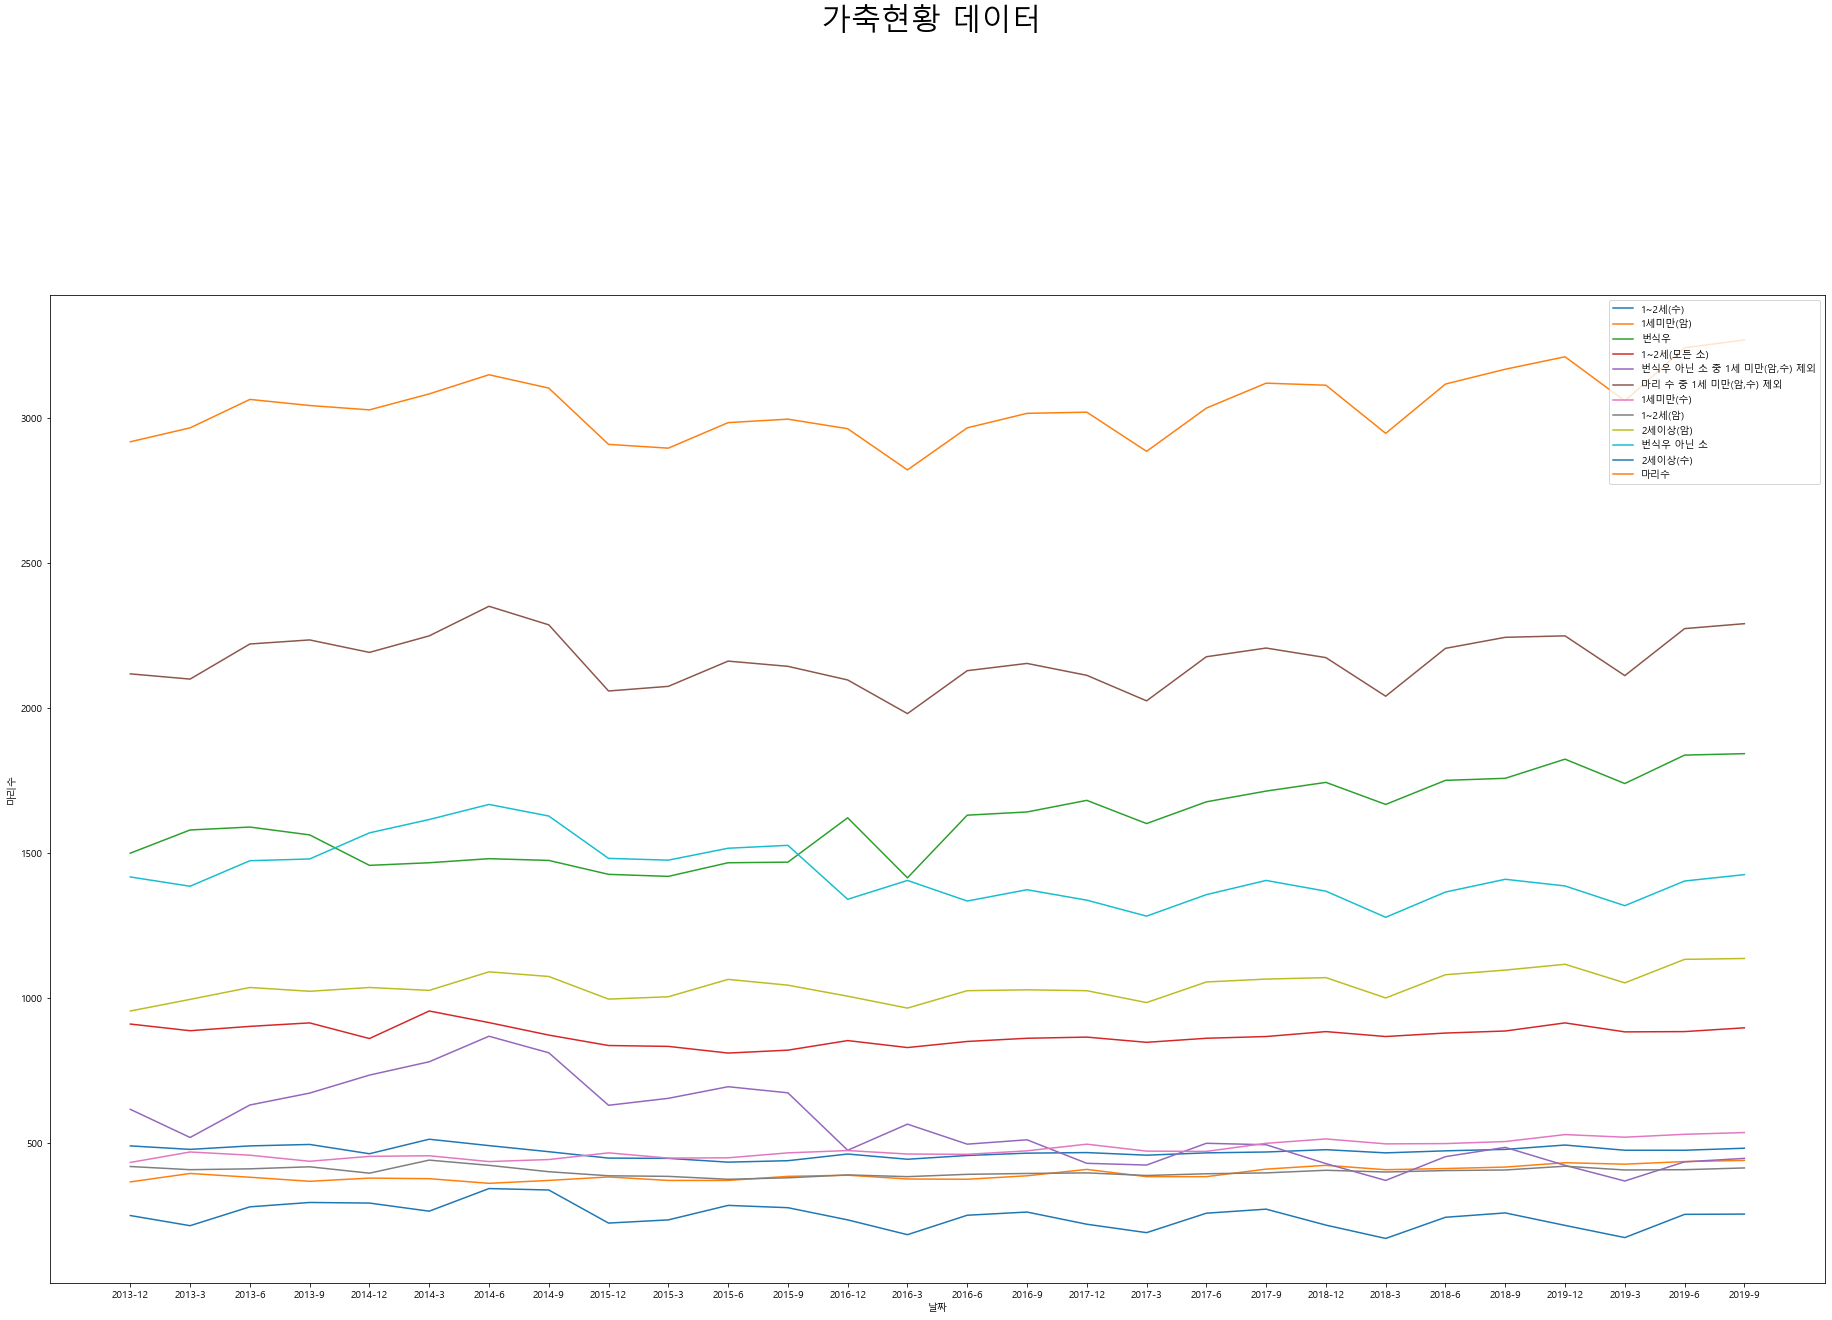

In [16]:
plt.figure(figsize=(70, 40))
plt.suptitle("가축현황 데이터", fontsize=30, x=0.3)
plt.subplot(2, 2, 1)

columns = list(set(status_df.columns) - set(["날짜", "연도", "월"]))

# plt.subplot(len(columns), 1, 1)
for c in columns:
    status_df[c] = status_df[c].astype("int")
    ax =sns.lineplot(x="날짜", y=f"{c}", data=status_df, legend="brief", label=c)

- 위 그래프의 경우 y 축 Range 값이 너무 크기 때문에 각각의 칼럼에 대한 시각화 진행

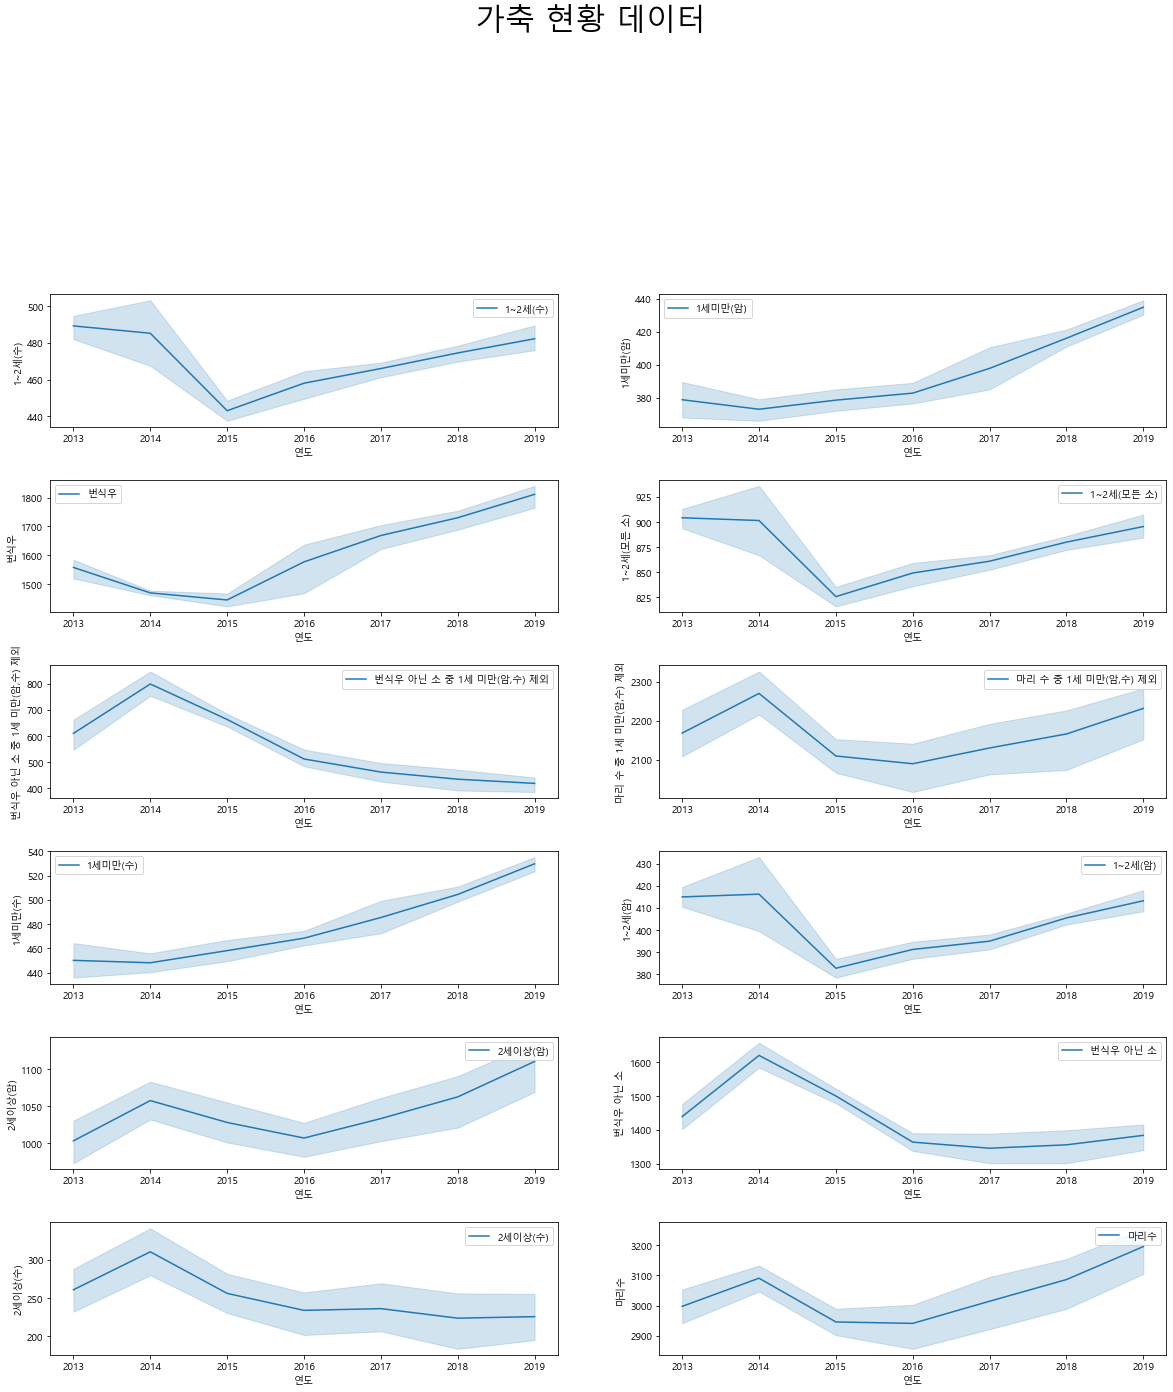

In [17]:
plt.figure(figsize=(20, 40))
plt.suptitle("가축 현황 데이터", fontsize=30, x=0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

for i, c in enumerate(columns):
    plt.subplot(len(columns), 2, i+1)
    status_df[c] = status_df[c].astype("int")
    sns.lineplot(x="연도", y=f"{c}", data=status_df, legend="brief", label=c)

### Check Data Distribution with plot
---

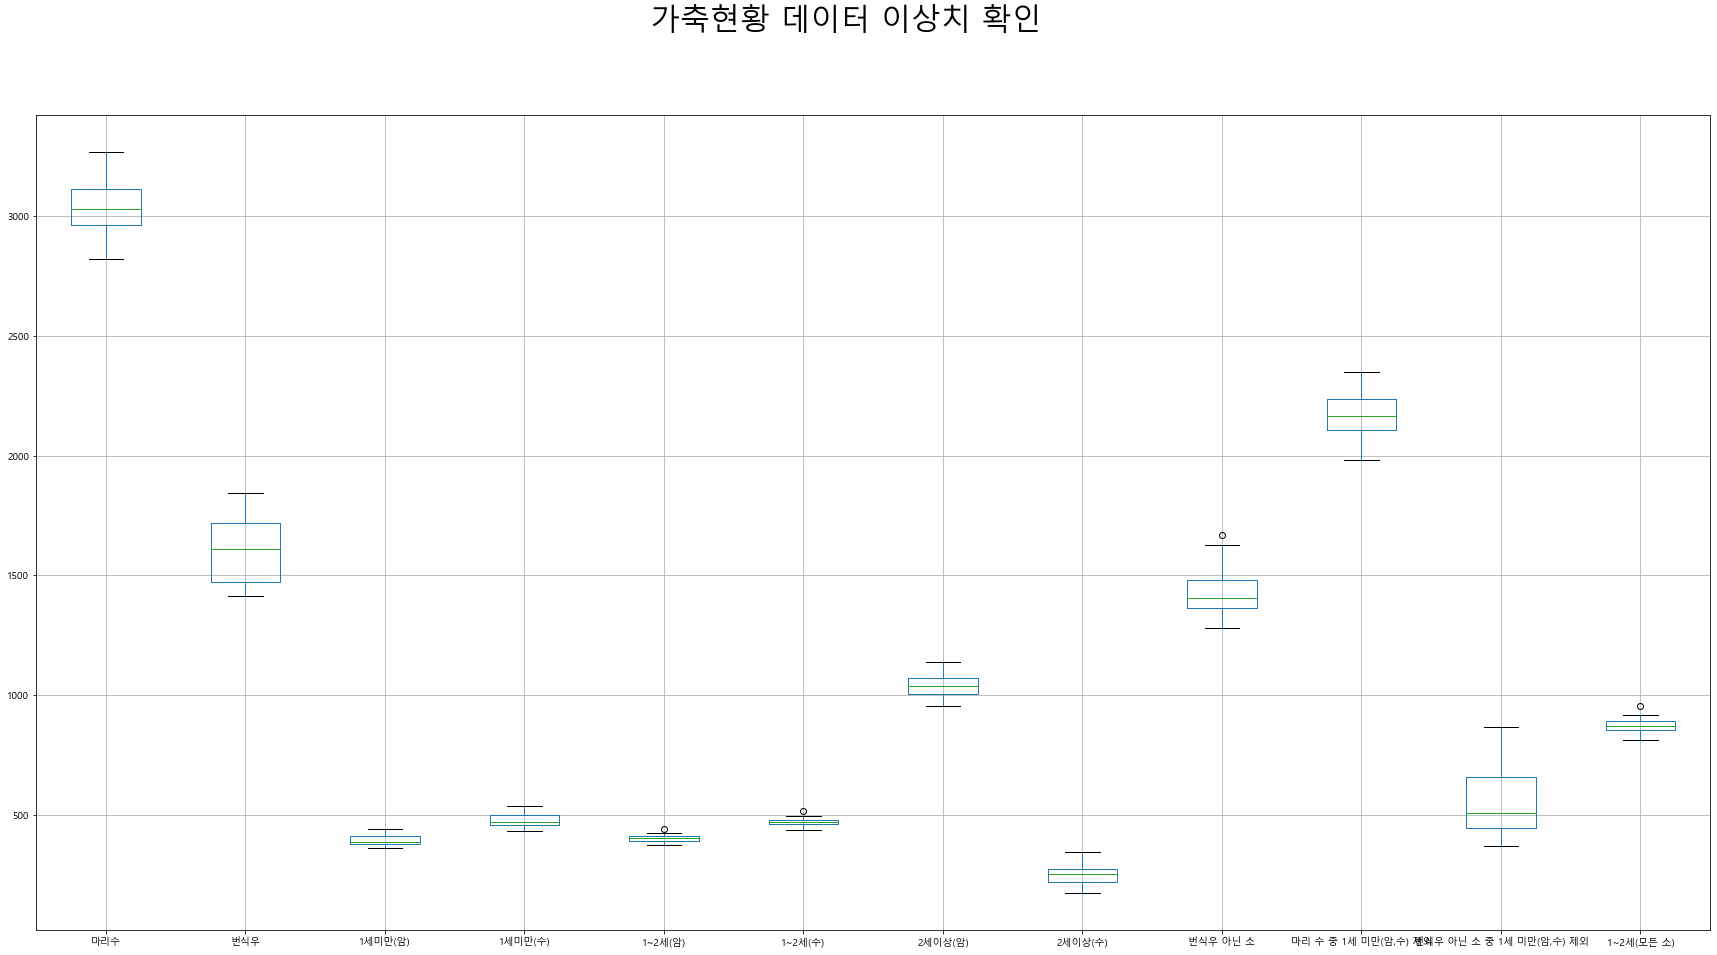

In [18]:
plt.figure(figsize=(30,15))
plt.suptitle("가축현황 데이터 이상치 확인", fontsize=30)
check_box_data = status_df.drop(["연도", "월", "날짜"], axis=1)
check_box_data.boxplot(figsize=(8,8))

이상치에 대해서 신경쓸 필요 없을 듯

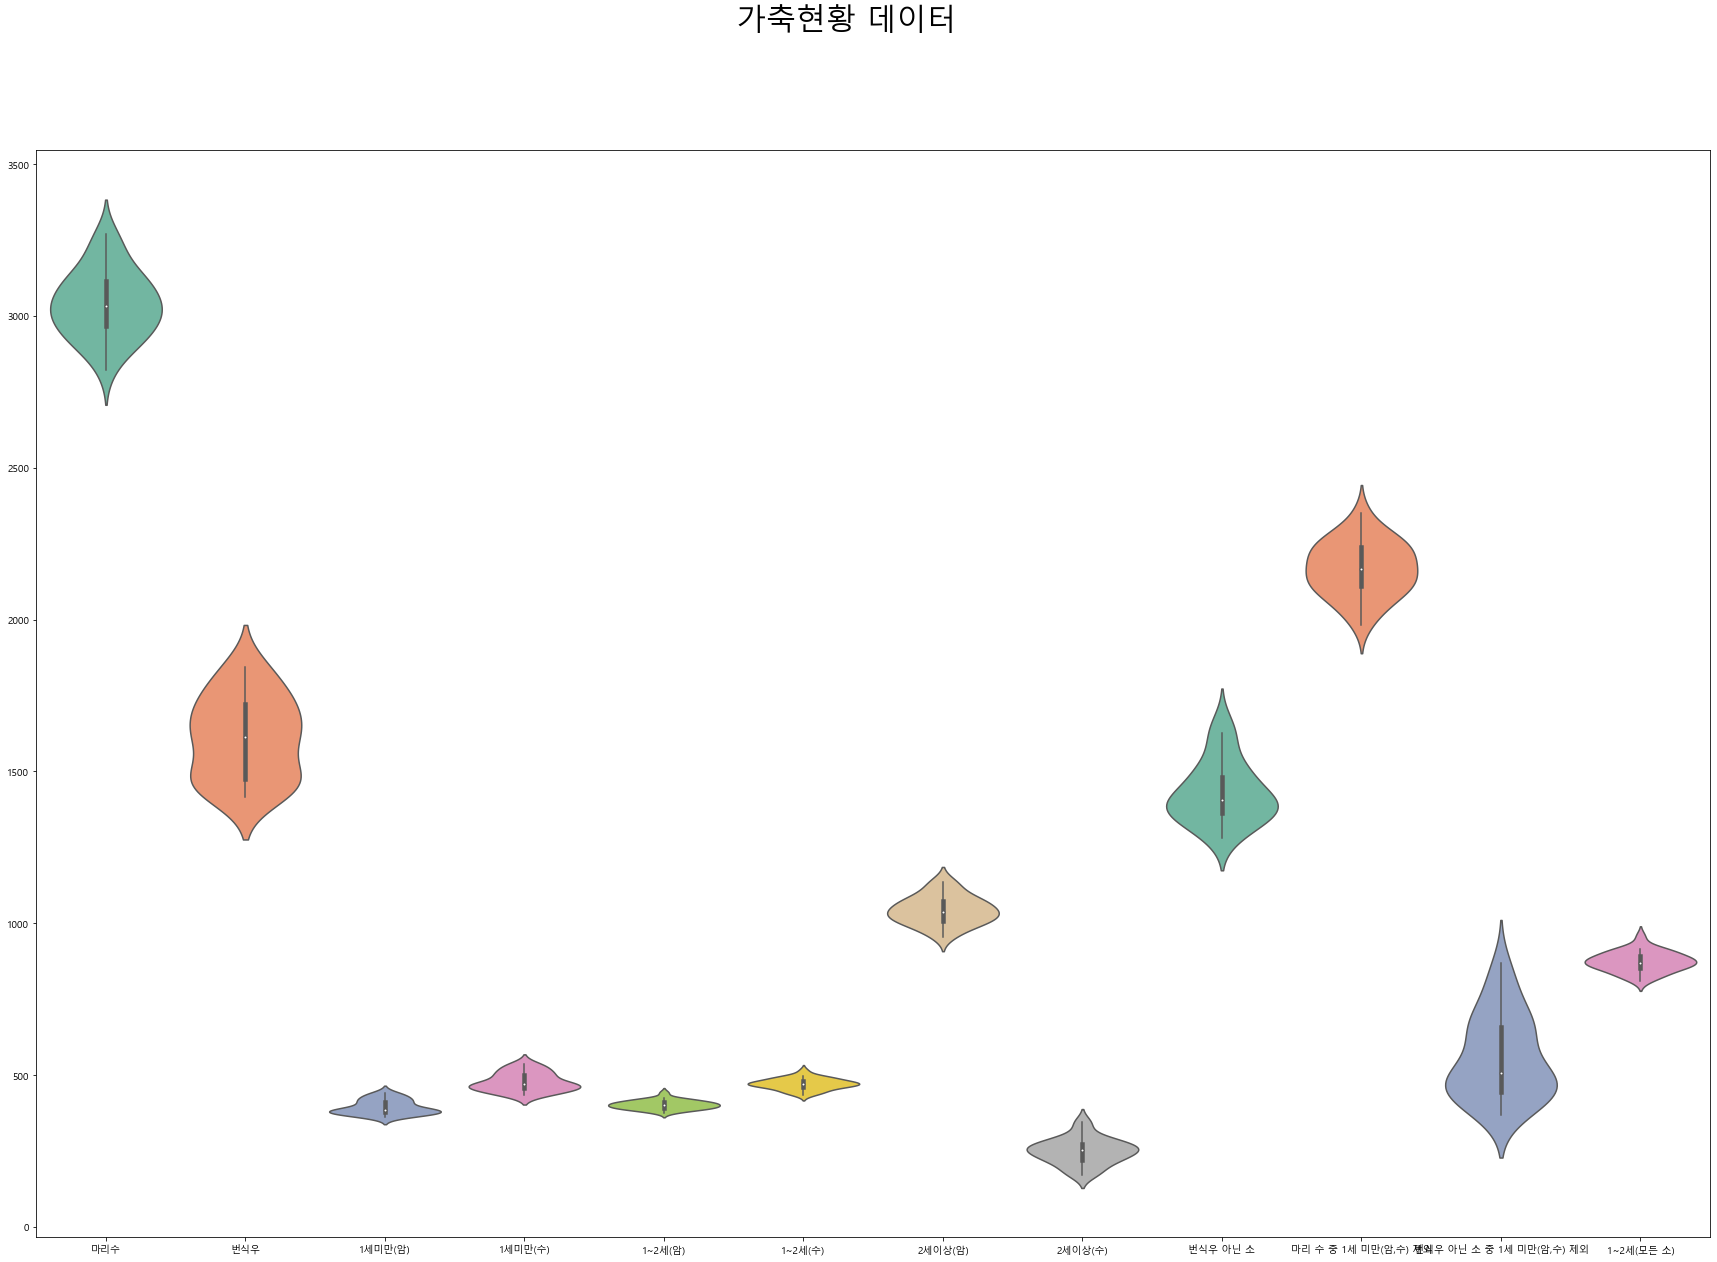

In [19]:
plt.figure(figsize=(30,20))
plt.suptitle("가축현황 데이터", fontsize=30)
ax = sns.violinplot(data=check_box_data, scale="width", palette="Set2")

In [20]:
target_data["한우 평균경매 금액_주간평균"]

0      13875.600000
1      13213.333333
2      12588.833333
3      12323.833333
4      12325.166667
           ...     
293    16835.000000
294    17555.000000
295    18369.000000
296    18757.000000
297    18757.000000
Name: 한우 평균경매 금액_주간평균, Length: 298, dtype: float64

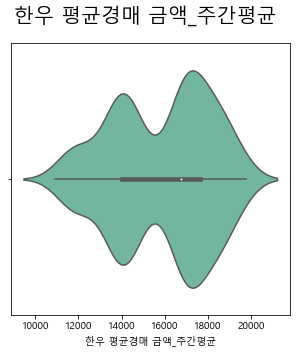

In [21]:
plt.figure(figsize=(5,5))
plt.suptitle("한우 평균경매 금액_주간평균", fontsize=20)
ax = sns.violinplot(target_data["한우 평균경매 금액_주간평균"], palette="Set2")

대체로 정규분포의 형태를 보임

### Concat target & livestock status data
---

##### Y(평균한우가격)과 상관분석을 위한 data merging

- dataframe 공통된 "분기"칼럼 생성
- outer join으로 데이터 결합

In [22]:
def convert_quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 3 < month <= 6:
        return 2
    elif 6 < month <= 9:
        return 3
    else:
        return 4

In [23]:
from datetime import datetime

target_data['주간날짜'] = target_data['주간날짜'].dt.strftime('%Y%m%d')

In [24]:
target_data['주간날짜'] 

0      20130106
1      20130113
2      20130120
3      20130127
4      20130203
         ...   
293    20180819
294    20180826
295    20180902
296    20180909
297    20180916
Name: 주간날짜, Length: 298, dtype: object

In [25]:
target_data["연도"] = target_data["주간날짜"].apply(lambda x : str(x)[:4])
target_data["분기"] = target_data["주간날짜"].apply(lambda x : convert_quarter(int(x[4:6])))
status_df["분기"] = status_df["월"].apply(lambda x : convert_quarter(int(x)))
print("====livestock status target data=====")
status_df.head()

====livestock status target data=====


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),분기
52,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1
53,2013,6,3064,1590,383,459,412,491,1037,281,2013-6,1474,2221,632,903,2
54,2013,9,3043,1563,369,438,419,496,1024,296,2013-9,1480,2235,673,915,3
55,2013,12,2918,1500,367,434,420,491,956,251,2013-12,1418,2118,617,911,4
56,2014,3,3083,1467,378,457,442,514,1027,266,2014-3,1616,2249,781,956,1


In [26]:
print("====Check target data=====")
target_data.head()

====Check target data=====


,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month,연도,분기
0,20130106,13875.600000,3044.800000,2013,1,2013,1
1,20130113,13213.333333,2984.000000,2013,1,2013,1
2,20130120,12588.833333,2904.000000,2013,1,2013,1
3,20130127,12323.833333,2959.666667,2013,1,2013,1
4,20130203,12325.166667,2862.833333,2013,2,2013,1


In [27]:
merge_df = pd.merge(status_df, target_data, on=["연도", "분기"], how="right")
merge_df

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),...,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),분기,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130106,13875.600000,3044.800000,2013,1
1,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130113,13213.333333,2984.000000,2013,1
2,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130120,12588.833333,2904.000000,2013,1
3,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130127,12323.833333,2959.666667,2013,1
4,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130203,12325.166667,2862.833333,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180819,16835.000000,5305.000000,2018,8
294,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180826,17555.000000,5207.500000,2018,8
295,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180902,18369.000000,5548.000000,2018,9
296,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180909,18757.000000,5754.000000,2018,9


In [28]:

print("====Final Data Set Shape===")
merge_df.sort_values(by=["연도", "분기"])

====Final Data Set Shape===


,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),...,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),분기,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130106,13875.600000,3044.800000,2013,1
1,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130113,13213.333333,2984.000000,2013,1
2,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130120,12588.833333,2904.000000,2013,1
3,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130127,12323.833333,2959.666667,2013,1
4,2013,3,2966,1580,396,470,409,479,996,216,...,1386,2100,520,888,1,20130203,12325.166667,2862.833333,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180819,16835.000000,5305.000000,2018,8
294,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180826,17555.000000,5207.500000,2018,8
295,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180902,18369.000000,5548.000000,2018,9
296,2018,9,3168,1758,418,506,408,479,1097,260,...,1410,2244,486,887,3,20180909,18757.000000,5754.000000,2018,9


In [29]:
"""
뻘짓의 흔정
# stauts_df data size fit
data = []
years = sort_target_data["연도"].unique()

for y in years:
    one_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] <= 3)] 
    two_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 3) & (sort_target_data["월"] <= 6)] 
    three_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 6) & (sort_target_data["월"] <= 9)] 
    four_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 9)] 
    

    print(f"data length : {len(data)}")

    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "3")].iloc[0])] * len(one_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "6")].iloc[0])] * len(two_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "9")].iloc[0])] * len(three_q)
    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "12")].iloc[0])] * len(four_q)

print(f"data length : {len(data)}")
df = pd.DataFrame(data, columns=status_df.columns)
"""

'\n뻘짓의 흔정\n# stauts_df data size fit\ndata = []\nyears = sort_target_data["연도"].unique()\n\nfor y in years:\n    one_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] <= 3)] \n    two_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 3) & (sort_target_data["월"] <= 6)] \n    three_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 6) & (sort_target_data["월"] <= 9)] \n    four_q = sort_target_data[(sort_target_data["연도"] == f"{y}") & (sort_target_data["월"] > 9)] \n    \n\n    print(f"data length : {len(data)}")\n\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "3")].iloc[0])] * len(one_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "6")].iloc[0])] * len(two_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (status_df["월"] == "9")].iloc[0])] * len(three_q)\n    data += [list(status_df[(status_df["연도"] == f"{y}") & (stat

### Correlation 

In [30]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return 

corr_data = merge_df.drop(["연도", "월", "분기","year","month"], axis=1)
corr = corr_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균
마리수,1.00,0.43,0.27,0.19,0.51,0.54,0.88,0.69,0.40,0.91,0.26,0.53,-0.19,0.29
번식우,0.43,1.00,0.78,0.78,0.08,0.20,0.34,-0.20,-0.66,0.10,-0.75,0.15,0.32,0.10
1세미만(암),0.27,0.78,1.00,0.97,-0.10,-0.04,0.23,-0.43,-0.57,-0.13,-0.73,-0.06,0.40,0.08
1세미만(수),0.19,0.78,0.97,1.00,-0.21,-0.15,0.20,-0.50,-0.63,-0.22,-0.78,-0.18,0.55,0.16
1~2세(암),0.51,0.08,-0.10,-0.21,1.00,0.98,0.12,0.31,0.34,0.58,0.32,0.99,-0.52,-0.33
1~2세(수),0.54,0.20,-0.04,-0.15,0.98,1.00,0.12,0.31,0.24,0.59,0.22,1.00,-0.53,-0.33
2세이상(암),0.88,0.34,0.23,0.20,0.12,0.12,1.00,0.68,0.39,0.80,0.26,0.12,-0.00,0.50
2세이상(수),0.69,-0.20,-0.43,-0.50,0.31,0.31,0.68,1.00,0.78,0.89,0.76,0.31,-0.39,0.32
번식우 아닌 소,0.40,-0.66,-0.57,-0.63,0.34,0.24,0.39,0.78,1.00,0.65,0.98,0.29,-0.49,0.14
"마리 수 중 1세 미만(암,수) 제외",0.91,0.10,-0.13,-0.22,0.58,0.59,0.80,0.89,0.65,1.00,0.58,0.59,-0.40,0.24


C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


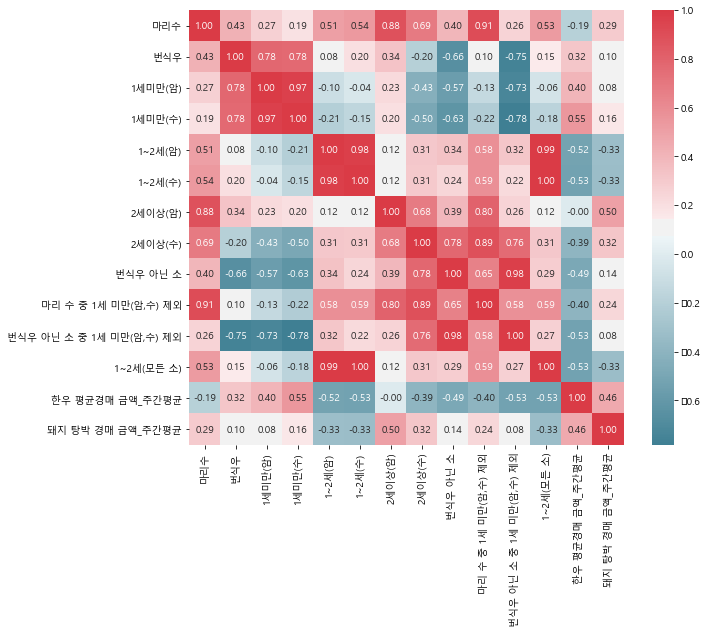

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, fmt=".2f", annot=True)

In [32]:
from pprint import pprint
ix = corr_data.corr().sort_values('한우 평균경매 금액_주간평균', ascending=False).index
data = corr_data.corr().sort_values('한우 평균경매 금액_주간평균', ascending=False)["한우 평균경매 금액_주간평균"]

positive_features = {x: data[x] for x in ix if data[x] >= 0}
negative_features = {x: data[x] for x in ix if data[x] <= 0}

print("===Positive Correlation Features====\n")
pprint(positive_features)
print()
print("===Negative Correlation Features====\n")
pprint(negative_features)

===Positive Correlation Features====

{'1세미만(수)': 0.5535157407680622,
 '1세미만(암)': 0.40324074913148483,
 '돼지 탕박 경매 금액_주간평균': 0.4601250888107784,
 '번식우': 0.3226583966506351,
 '한우 평균경매 금액_주간평균': 1.0}

===Negative Correlation Features====

{'1~2세(모든 소)': -0.530065529289443,
 '1~2세(수)': -0.5301667962998662,
 '1~2세(암)': -0.5233195811678225,
 '2세이상(수)': -0.3922132947864294,
 '2세이상(암)': -0.0046318702565086856,
 '마리 수 중 1세 미만(암,수) 제외': -0.39585997448026566,
 '마리수': -0.1918094325669266,
 '번식우 아닌 소': -0.4866536397143484,
 '번식우 아닌 소 중 1세 미만(암,수) 제외': -0.5292704147905698}


### 결과 해석

---
- 1~2세(수): -0.53로 가장높음.
- 1~2세(모든 소) -0.53로 높음.

In [33]:
merge_df.to_pickle('가축사육현황merge.pkl')